In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import ImageQuant2, load_image, raw_data_path

np.random.seed(12345)
%matplotlib widget

In [2]:
# Import cytoplasmic profile
cytbg = np.loadtxt("../../data/calibration_cyt.txt")

# Import embryos dataframe
df = pd.read_csv("../../data/par2_nebd_embryos.csv")

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == "lp637") * (df.RNAi == "wt")].sample(n)
df_c56s = df[(df.Line == "nwg240") * (df.RNAi == "wt")].sample(n)
df_l109r = df[(df.Line == "nwg338") * (df.RNAi == "wt")].sample(n)
df_l50r = df[(df.Line == "nwg400") * (df.RNAi == "wt")].sample(n)
df_het = df[(df.Line == "nwg325bal") * (df.RNAi == "wt")].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv("../../data/calibration_embryos.csv")

In [3]:
# Import data
df = pd.read_csv("../../data/calibration_embryos.csv")
if raw_data_path:
    df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
paths_wt = df[df.Line == "lp637"].Path.to_list()
paths_c56s = df[df.Line == "nwg240"].Path.to_list()
paths_l109r = df[df.Line == "nwg338"].Path.to_list()
paths_l50r = df[df.Line == "nwg400"].Path.to_list()
paths_het = df[df.Line == "nwg325bal"].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + "/af_corrected.tif") for p in paths_wt]
imgs_c56s = [load_image(p + "/af_corrected.tif") for p in paths_c56s]
imgs_l109r = [load_image(p + "/af_corrected.tif") for p in paths_l109r]
imgs_l50r = [load_image(p + "/af_corrected.tif") for p in paths_l50r]
imgs_het = [load_image(p + "/af_corrected.tif") for p in paths_het]

rois_wt = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_wt]
rois_c56s = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_c56s]
rois_l109r = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_l109r]
rois_l50r = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_l50r]
rois_het = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_het]

10


In [4]:
# Global calibration parameters
kwargs_dict = {"lr": 0.005, "descent_steps": 1000}

### Calibration 1 (WT)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:01<20:55,  1.26s/it]

  1%|█▋                                                                                                                                             | 12/1000 [00:01<01:23, 11.88it/s]

  2%|███▏                                                                                                                                           | 22/1000 [00:01<00:42, 22.88it/s]

  3%|████▊                                                                                                                                          | 34/1000 [00:01<00:25, 37.22it/s]

  4%|██████▎                                                                                                                                        | 44/1000 [00:01<00:20, 47.38it/s]

  5%|███████▋                                                                                                                                       | 54/1000 [00:01<00:16, 56.43it/s]

  6%|█████████▏                                                                                                                                     | 64/1000 [00:01<00:14, 64.73it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:02<00:13, 66.58it/s]

  8%|███████████▊                                                                                                                                   | 83/1000 [00:02<00:12, 71.86it/s]

  9%|█████████████▎                                                                                                                                 | 93/1000 [00:02<00:11, 78.59it/s]

 10%|██████████████▉                                                                                                                               | 105/1000 [00:02<00:10, 89.23it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:02<00:09, 91.52it/s]

 13%|██████████████████▏                                                                                                                           | 128/1000 [00:02<00:08, 98.76it/s]

 14%|███████████████████▋                                                                                                                          | 139/1000 [00:02<00:08, 97.45it/s]

 15%|█████████████████████▎                                                                                                                        | 150/1000 [00:02<00:08, 95.37it/s]

 16%|██████████████████████▋                                                                                                                       | 160/1000 [00:02<00:08, 93.78it/s]

 17%|████████████████████████▎                                                                                                                     | 171/1000 [00:03<00:08, 97.69it/s]

 18%|█████████████████████████▉                                                                                                                    | 183/1000 [00:03<00:08, 99.81it/s]

 19%|███████████████████████████▎                                                                                                                 | 194/1000 [00:03<00:08, 100.48it/s]

 20%|████████████████████████████▉                                                                                                                | 205/1000 [00:03<00:07, 102.94it/s]

 22%|██████████████████████████████▌                                                                                                              | 217/1000 [00:03<00:07, 106.93it/s]

 23%|████████████████████████████████▎                                                                                                            | 229/1000 [00:03<00:07, 108.39it/s]

 24%|█████████████████████████████████▊                                                                                                           | 240/1000 [00:03<00:07, 107.07it/s]

 25%|███████████████████████████████████▍                                                                                                         | 251/1000 [00:03<00:07, 104.77it/s]

 26%|█████████████████████████████████████▏                                                                                                        | 262/1000 [00:03<00:09, 81.44it/s]

 27%|██████████████████████████████████████▍                                                                                                       | 271/1000 [00:04<00:09, 77.60it/s]

 28%|███████████████████████████████████████▉                                                                                                      | 281/1000 [00:04<00:08, 82.36it/s]

 29%|█████████████████████████████████████████▎                                                                                                    | 291/1000 [00:04<00:08, 86.74it/s]

 30%|██████████████████████████████████████████▋                                                                                                   | 301/1000 [00:04<00:08, 84.31it/s]

 31%|████████████████████████████████████████████                                                                                                  | 310/1000 [00:04<00:08, 82.63it/s]

 32%|█████████████████████████████████████████████▎                                                                                                | 319/1000 [00:04<00:08, 81.43it/s]

 33%|███████████████████████████████████████████████                                                                                               | 331/1000 [00:04<00:07, 90.56it/s]

 34%|████████████████████████████████████████████████▍                                                                                             | 341/1000 [00:04<00:07, 93.13it/s]

 35%|█████████████████████████████████████████████████▊                                                                                            | 351/1000 [00:05<00:08, 78.06it/s]

 36%|███████████████████████████████████████████████████                                                                                           | 360/1000 [00:05<00:08, 76.68it/s]

 37%|████████████████████████████████████████████████████▍                                                                                         | 369/1000 [00:05<00:08, 74.71it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                        | 379/1000 [00:05<00:07, 79.20it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                      | 389/1000 [00:05<00:07, 82.37it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                     | 400/1000 [00:05<00:06, 87.77it/s]

 41%|██████████████████████████████████████████████████████████                                                                                    | 409/1000 [00:05<00:06, 86.87it/s]

 42%|███████████████████████████████████████████████████████████▍                                                                                  | 419/1000 [00:05<00:06, 89.98it/s]

 43%|████████████████████████████████████████████████████████████▉                                                                                 | 429/1000 [00:05<00:06, 92.14it/s]

 44%|██████████████████████████████████████████████████████████████▍                                                                               | 440/1000 [00:06<00:05, 96.28it/s]

 45%|███████████████████████████████████████████████████████████████▉                                                                              | 450/1000 [00:06<00:06, 91.14it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:06<00:05, 94.54it/s]

 47%|███████████████████████████████████████████████████████████████████                                                                           | 472/1000 [00:06<00:05, 97.16it/s]

 48%|████████████████████████████████████████████████████████████████████▌                                                                         | 483/1000 [00:06<00:05, 98.96it/s]

 50%|█████████████████████████████████████████████████████████████████████▉                                                                       | 496/1000 [00:06<00:04, 104.37it/s]

 51%|███████████████████████████████████████████████████████████████████████▍                                                                     | 507/1000 [00:06<00:04, 102.59it/s]

 52%|█████████████████████████████████████████████████████████████████████████▏                                                                   | 519/1000 [00:06<00:04, 105.58it/s]

 53%|██████████████████████████████████████████████████████████████████████████▋                                                                  | 530/1000 [00:06<00:04, 100.42it/s]

 54%|████████████████████████████████████████████████████████████████████████████▊                                                                 | 541/1000 [00:07<00:04, 96.36it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▉                                                               | 553/1000 [00:07<00:04, 101.20it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▌                                                             | 564/1000 [00:07<00:04, 103.20it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                            | 575/1000 [00:07<00:04, 102.85it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▋                                                          | 586/1000 [00:07<00:03, 104.41it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▎                                                        | 598/1000 [00:07<00:03, 106.96it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████                                                       | 610/1000 [00:07<00:03, 107.83it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▌                                                     | 621/1000 [00:07<00:03, 106.79it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 633/1000 [00:07<00:03, 108.50it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 644/1000 [00:08<00:03, 103.29it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 655/1000 [00:08<00:03, 101.06it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 666/1000 [00:08<00:03, 96.88it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 677/1000 [00:08<00:03, 98.56it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 688/1000 [00:08<00:03, 99.25it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████                                           | 698/1000 [00:08<00:03, 99.16it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 709/1000 [00:08<00:02, 100.04it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 720/1000 [00:08<00:02, 100.60it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 731/1000 [00:08<00:02, 100.93it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 742/1000 [00:09<00:02, 99.58it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 752/1000 [00:09<00:02, 98.99it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 764/1000 [00:09<00:02, 103.03it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 775/1000 [00:09<00:02, 103.01it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 786/1000 [00:09<00:02, 102.10it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 797/1000 [00:09<00:01, 102.13it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 810/1000 [00:09<00:01, 107.94it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 821/1000 [00:09<00:01, 107.85it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 833/1000 [00:09<00:01, 110.50it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 845/1000 [00:09<00:01, 106.61it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 856/1000 [00:10<00:01, 105.23it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 867/1000 [00:10<00:01, 105.84it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 878/1000 [00:10<00:01, 105.45it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 889/1000 [00:10<00:01, 105.46it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 901/1000 [00:10<00:00, 108.97it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 912/1000 [00:10<00:01, 67.71it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 921/1000 [00:10<00:01, 69.52it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 930/1000 [00:11<00:01, 68.68it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 939/1000 [00:11<00:00, 72.75it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 948/1000 [00:11<00:00, 73.49it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 956/1000 [00:11<00:00, 66.78it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 967/1000 [00:11<00:00, 76.62it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 977/1000 [00:11<00:00, 80.70it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 987/1000 [00:11<00:00, 85.39it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:11<00:00, 74.18it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.28it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

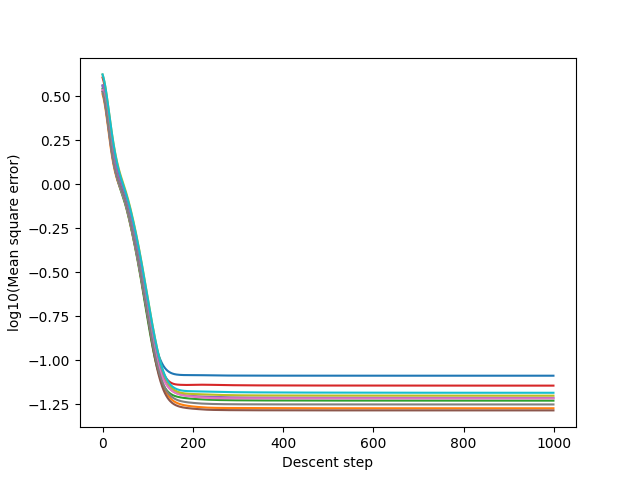

In [5]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<07:44,  2.15it/s]

  1%|█▋                                                                                                                                             | 12/1000 [00:00<00:36, 27.20it/s]

  2%|███▎                                                                                                                                           | 23/1000 [00:00<00:20, 47.46it/s]

  3%|████▊                                                                                                                                          | 34/1000 [00:00<00:15, 62.78it/s]

  4%|██████▎                                                                                                                                        | 44/1000 [00:00<00:13, 71.34it/s]

  5%|███████▋                                                                                                                                       | 54/1000 [00:00<00:12, 77.82it/s]

  6%|█████████▏                                                                                                                                     | 64/1000 [00:01<00:11, 82.46it/s]

  7%|██████████▌                                                                                                                                    | 74/1000 [00:01<00:11, 81.80it/s]

  8%|████████████                                                                                                                                   | 84/1000 [00:01<00:10, 84.98it/s]

  9%|█████████████▍                                                                                                                                 | 94/1000 [00:01<00:10, 87.43it/s]

 10%|██████████████▊                                                                                                                               | 104/1000 [00:01<00:09, 90.69it/s]

 12%|████████████████▎                                                                                                                             | 115/1000 [00:01<00:09, 94.70it/s]

 13%|█████████████████▉                                                                                                                            | 126/1000 [00:01<00:08, 98.09it/s]

 14%|███████████████████▎                                                                                                                         | 137/1000 [00:01<00:08, 100.07it/s]

 15%|████████████████████▊                                                                                                                        | 148/1000 [00:01<00:08, 102.64it/s]

 16%|██████████████████████▌                                                                                                                       | 159/1000 [00:02<00:10, 80.42it/s]

 17%|███████████████████████▊                                                                                                                      | 168/1000 [00:02<00:11, 72.80it/s]

 18%|████████████████████████▉                                                                                                                     | 176/1000 [00:02<00:11, 70.48it/s]

 18%|██████████████████████████▏                                                                                                                   | 184/1000 [00:02<00:11, 72.70it/s]

 19%|███████████████████████████▎                                                                                                                  | 192/1000 [00:02<00:11, 69.39it/s]

 20%|████████████████████████████▍                                                                                                                 | 200/1000 [00:02<00:12, 65.80it/s]

 21%|█████████████████████████████▍                                                                                                                | 207/1000 [00:02<00:11, 66.19it/s]

 21%|██████████████████████████████▍                                                                                                               | 214/1000 [00:03<00:12, 61.52it/s]

 22%|███████████████████████████████▍                                                                                                              | 221/1000 [00:03<00:12, 60.67it/s]

 23%|████████████████████████████████▍                                                                                                             | 228/1000 [00:03<00:12, 62.91it/s]

 24%|█████████████████████████████████▊                                                                                                            | 238/1000 [00:03<00:10, 71.88it/s]

 25%|███████████████████████████████████▏                                                                                                          | 248/1000 [00:03<00:09, 77.41it/s]

 26%|████████████████████████████████████▊                                                                                                         | 259/1000 [00:03<00:08, 83.57it/s]

 27%|██████████████████████████████████████                                                                                                        | 268/1000 [00:03<00:08, 84.27it/s]

 28%|███████████████████████████████████████▎                                                                                                      | 277/1000 [00:03<00:08, 84.24it/s]

 29%|████████████████████████████████████████▊                                                                                                     | 287/1000 [00:03<00:08, 87.71it/s]

 30%|██████████████████████████████████████████▍                                                                                                   | 299/1000 [00:04<00:07, 96.29it/s]

 31%|███████████████████████████████████████████▉                                                                                                  | 309/1000 [00:04<00:07, 96.64it/s]

 32%|█████████████████████████████████████████████▍                                                                                               | 322/1000 [00:04<00:06, 104.10it/s]

 34%|███████████████████████████████████████████████▏                                                                                             | 335/1000 [00:04<00:06, 110.40it/s]

 35%|████████████████████████████████████████████████▉                                                                                            | 347/1000 [00:04<00:05, 108.89it/s]

 36%|██████████████████████████████████████████████████▌                                                                                          | 359/1000 [00:04<00:05, 111.88it/s]

 37%|████████████████████████████████████████████████████▍                                                                                        | 372/1000 [00:04<00:05, 114.49it/s]

 38%|██████████████████████████████████████████████████████▎                                                                                      | 385/1000 [00:04<00:05, 117.30it/s]

 40%|████████████████████████████████████████████████████████                                                                                     | 398/1000 [00:04<00:05, 119.73it/s]

 41%|█████████████████████████████████████████████████████████▉                                                                                   | 411/1000 [00:04<00:04, 120.65it/s]

 42%|███████████████████████████████████████████████████████████▊                                                                                 | 424/1000 [00:05<00:04, 118.01it/s]

 44%|█████████████████████████████████████████████████████████████▍                                                                               | 436/1000 [00:05<00:05, 106.48it/s]

 45%|███████████████████████████████████████████████████████████████▍                                                                              | 447/1000 [00:05<00:06, 90.32it/s]

 46%|████████████████████████████████████████████████████████████████▉                                                                             | 457/1000 [00:05<00:06, 83.82it/s]

 47%|██████████████████████████████████████████████████████████████████▍                                                                           | 468/1000 [00:05<00:05, 89.59it/s]

 48%|███████████████████████████████████████████████████████████████████▉                                                                          | 478/1000 [00:05<00:05, 87.39it/s]

 49%|█████████████████████████████████████████████████████████████████████▎                                                                        | 488/1000 [00:05<00:06, 80.21it/s]

 50%|██████████████████████████████████████████████████████████████████████▌                                                                       | 497/1000 [00:06<00:06, 72.73it/s]

 51%|███████████████████████████████████████████████████████████████████████▊                                                                      | 506/1000 [00:06<00:06, 75.70it/s]

 52%|█████████████████████████████████████████████████████████████████████████▌                                                                    | 518/1000 [00:06<00:05, 85.83it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                   | 529/1000 [00:06<00:05, 91.94it/s]

 54%|████████████████████████████████████████████████████████████████████████████▋                                                                 | 540/1000 [00:06<00:04, 94.97it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▏                                                               | 551/1000 [00:06<00:04, 96.64it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▋                                                              | 561/1000 [00:06<00:04, 97.18it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████                                                             | 571/1000 [00:06<00:04, 95.29it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                           | 582/1000 [00:06<00:04, 97.39it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                         | 594/1000 [00:07<00:03, 102.58it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                       | 605/1000 [00:07<00:03, 104.51it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▍                                                      | 616/1000 [00:07<00:04, 93.39it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 626/1000 [00:07<00:04, 84.96it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 635/1000 [00:07<00:04, 81.16it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 644/1000 [00:07<00:04, 76.47it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 652/1000 [00:07<00:04, 74.58it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 660/1000 [00:07<00:04, 69.89it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 669/1000 [00:08<00:04, 73.59it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 681/1000 [00:08<00:03, 83.71it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 692/1000 [00:08<00:03, 90.65it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 703/1000 [00:08<00:03, 94.43it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 714/1000 [00:08<00:02, 96.94it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 725/1000 [00:08<00:02, 98.89it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 736/1000 [00:08<00:02, 100.21it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 747/1000 [00:08<00:02, 101.99it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 758/1000 [00:08<00:02, 103.45it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 769/1000 [00:08<00:02, 104.02it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 780/1000 [00:09<00:02, 103.82it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 791/1000 [00:09<00:02, 103.33it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 802/1000 [00:09<00:01, 103.54it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 813/1000 [00:09<00:01, 102.83it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 824/1000 [00:09<00:01, 103.84it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 836/1000 [00:09<00:01, 105.99it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 849/1000 [00:09<00:01, 111.34it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 862/1000 [00:09<00:01, 114.83it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 875/1000 [00:09<00:01, 117.42it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 888/1000 [00:10<00:00, 118.90it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 901/1000 [00:10<00:00, 120.16it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 914/1000 [00:10<00:00, 117.23it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 926/1000 [00:10<00:00, 106.38it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:10<00:00, 94.94it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 947/1000 [00:10<00:00, 84.32it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 956/1000 [00:10<00:00, 79.71it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 965/1000 [00:10<00:00, 72.56it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 973/1000 [00:11<00:00, 69.12it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 981/1000 [00:11<00:00, 69.31it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 989/1000 [00:11<00:00, 66.55it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:11<00:00, 65.81it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.67it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

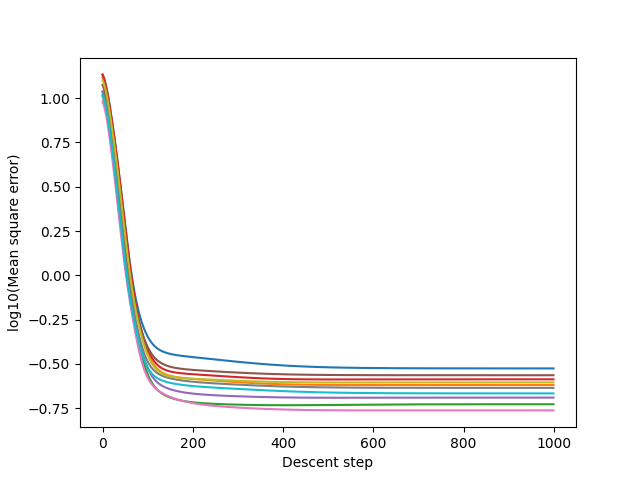

In [6]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<07:08,  2.33it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:31, 31.67it/s]

  2%|███▌                                                                                                                                           | 25/1000 [00:00<00:17, 54.74it/s]

  4%|█████▎                                                                                                                                         | 37/1000 [00:00<00:13, 70.73it/s]

  5%|██████▊                                                                                                                                        | 48/1000 [00:00<00:11, 79.83it/s]

  6%|████████▍                                                                                                                                      | 59/1000 [00:00<00:10, 86.33it/s]

  7%|██████████                                                                                                                                     | 70/1000 [00:01<00:10, 91.61it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:01<00:09, 96.23it/s]

  9%|█████████████▎                                                                                                                                | 94/1000 [00:01<00:08, 104.74it/s]

 11%|███████████████                                                                                                                              | 107/1000 [00:01<00:08, 109.61it/s]

 12%|████████████████▉                                                                                                                            | 120/1000 [00:01<00:07, 113.46it/s]

 13%|██████████████████▊                                                                                                                          | 133/1000 [00:01<00:07, 116.00it/s]

 14%|████████████████████▍                                                                                                                        | 145/1000 [00:01<00:07, 115.64it/s]

 16%|██████████████████████▎                                                                                                                      | 158/1000 [00:01<00:07, 117.74it/s]

 17%|████████████████████████                                                                                                                     | 171/1000 [00:01<00:06, 118.97it/s]

 18%|█████████████████████████▊                                                                                                                   | 183/1000 [00:02<00:06, 117.76it/s]

 20%|███████████████████████████▋                                                                                                                 | 196/1000 [00:02<00:06, 118.98it/s]

 21%|█████████████████████████████▍                                                                                                               | 209/1000 [00:02<00:06, 120.09it/s]

 22%|███████████████████████████████▎                                                                                                             | 222/1000 [00:02<00:06, 119.89it/s]

 24%|█████████████████████████████████▏                                                                                                           | 235/1000 [00:02<00:06, 119.63it/s]

 25%|██████████████████████████████████▉                                                                                                          | 248/1000 [00:02<00:06, 120.53it/s]

 26%|████████████████████████████████████▊                                                                                                        | 261/1000 [00:02<00:06, 120.72it/s]

 27%|██████████████████████████████████████▋                                                                                                      | 274/1000 [00:02<00:06, 111.31it/s]

 29%|████████████████████████████████████████▍                                                                                                    | 287/1000 [00:02<00:06, 114.25it/s]

 30%|██████████████████████████████████████████▎                                                                                                  | 300/1000 [00:03<00:06, 116.37it/s]

 31%|████████████████████████████████████████████▏                                                                                                | 313/1000 [00:03<00:05, 118.49it/s]

 33%|█████████████████████████████████████████████▉                                                                                               | 326/1000 [00:03<00:05, 119.67it/s]

 34%|███████████████████████████████████████████████▊                                                                                             | 339/1000 [00:03<00:05, 118.37it/s]

 35%|█████████████████████████████████████████████████▋                                                                                           | 352/1000 [00:03<00:05, 119.77it/s]

 36%|███████████████████████████████████████████████████▍                                                                                         | 365/1000 [00:03<00:05, 120.31it/s]

 38%|█████████████████████████████████████████████████████▎                                                                                       | 378/1000 [00:03<00:05, 120.85it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                     | 391/1000 [00:03<00:05, 120.10it/s]

 40%|████████████████████████████████████████████████████████▉                                                                                    | 404/1000 [00:03<00:05, 114.08it/s]

 42%|██████████████████████████████████████████████████████████▋                                                                                  | 416/1000 [00:03<00:05, 115.22it/s]

 43%|████████████████████████████████████████████████████████████▎                                                                                | 428/1000 [00:04<00:04, 115.77it/s]

 44%|██████████████████████████████████████████████████████████████                                                                               | 440/1000 [00:04<00:04, 115.11it/s]

 45%|███████████████████████████████████████████████████████████████▋                                                                             | 452/1000 [00:04<00:04, 114.61it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                           | 464/1000 [00:04<00:04, 112.90it/s]

 48%|███████████████████████████████████████████████████████████████████                                                                          | 476/1000 [00:04<00:04, 113.39it/s]

 49%|████████████████████████████████████████████████████████████████████▉                                                                        | 489/1000 [00:04<00:04, 116.40it/s]

 50%|██████████████████████████████████████████████████████████████████████▋                                                                      | 501/1000 [00:04<00:04, 115.18it/s]

 51%|████████████████████████████████████████████████████████████████████████▍                                                                    | 514/1000 [00:04<00:04, 117.07it/s]

 53%|██████████████████████████████████████████████████████████████████████████▏                                                                  | 526/1000 [00:04<00:04, 115.28it/s]

 54%|███████████████████████████████████████████████████████████████████████████▊                                                                 | 538/1000 [00:05<00:04, 115.33it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▌                                                               | 550/1000 [00:05<00:04, 112.43it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▍                                                             | 563/1000 [00:05<00:03, 115.16it/s]

 58%|█████████████████████████████████████████████████████████████████████████████████▏                                                           | 576/1000 [00:05<00:03, 116.79it/s]

 59%|██████████████████████████████████████████████████████████████████████████████████▉                                                          | 588/1000 [00:05<00:03, 115.64it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▋                                                        | 601/1000 [00:05<00:03, 116.85it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▍                                                      | 613/1000 [00:05<00:03, 116.64it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 625/1000 [00:05<00:03, 116.53it/s]

 64%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 637/1000 [00:05<00:03, 116.63it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 649/1000 [00:06<00:03, 114.35it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 661/1000 [00:06<00:02, 113.51it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 673/1000 [00:06<00:02, 112.31it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 685/1000 [00:06<00:02, 110.57it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 697/1000 [00:06<00:02, 111.20it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 709/1000 [00:06<00:02, 112.72it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 721/1000 [00:06<00:02, 113.38it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 733/1000 [00:06<00:02, 114.84it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 746/1000 [00:06<00:02, 116.52it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 758/1000 [00:06<00:02, 117.03it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 771/1000 [00:07<00:01, 118.74it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 783/1000 [00:07<00:01, 118.78it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 795/1000 [00:07<00:01, 118.86it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 807/1000 [00:07<00:01, 118.36it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 820/1000 [00:07<00:01, 119.03it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 833/1000 [00:07<00:01, 120.17it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 846/1000 [00:07<00:01, 119.53it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 858/1000 [00:07<00:01, 119.60it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 871/1000 [00:07<00:01, 120.09it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 884/1000 [00:08<00:00, 117.79it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 896/1000 [00:08<00:00, 108.47it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 907/1000 [00:08<00:01, 88.16it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 917/1000 [00:08<00:01, 78.59it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 926/1000 [00:08<00:00, 76.05it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 934/1000 [00:08<00:00, 74.82it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 942/1000 [00:08<00:00, 74.42it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 950/1000 [00:08<00:00, 75.46it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 960/1000 [00:09<00:00, 80.44it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 969/1000 [00:09<00:00, 78.21it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 977/1000 [00:09<00:00, 74.32it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 985/1000 [00:09<00:00, 73.05it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:09<00:00, 71.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.92it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

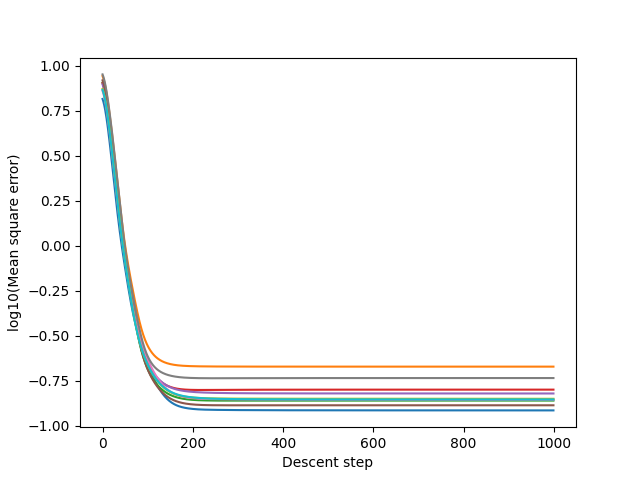

In [7]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<07:14,  2.30it/s]

  1%|█▊                                                                                                                                             | 13/1000 [00:00<00:31, 31.09it/s]

  2%|███▎                                                                                                                                           | 23/1000 [00:00<00:20, 47.68it/s]

  4%|█████                                                                                                                                          | 35/1000 [00:00<00:14, 66.14it/s]

  5%|██████▋                                                                                                                                        | 47/1000 [00:00<00:12, 78.79it/s]

  6%|████████▏                                                                                                                                      | 57/1000 [00:00<00:11, 80.59it/s]

  7%|█████████▋                                                                                                                                     | 68/1000 [00:01<00:10, 87.46it/s]

  8%|███████████▍                                                                                                                                   | 80/1000 [00:01<00:09, 94.58it/s]

  9%|█████████████                                                                                                                                 | 92/1000 [00:01<00:08, 101.54it/s]

 10%|██████████████▊                                                                                                                              | 105/1000 [00:01<00:08, 107.87it/s]

 12%|████████████████▋                                                                                                                            | 118/1000 [00:01<00:07, 111.89it/s]

 13%|██████████████████▍                                                                                                                          | 131/1000 [00:01<00:07, 115.27it/s]

 14%|████████████████████▎                                                                                                                        | 144/1000 [00:01<00:07, 117.16it/s]

 16%|█████████████████████▉                                                                                                                       | 156/1000 [00:01<00:07, 114.28it/s]

 17%|███████████████████████▊                                                                                                                     | 169/1000 [00:01<00:07, 116.38it/s]

 18%|█████████████████████████▌                                                                                                                   | 181/1000 [00:02<00:07, 113.94it/s]

 19%|███████████████████████████▏                                                                                                                 | 193/1000 [00:02<00:07, 112.16it/s]

 20%|████████████████████████████▉                                                                                                                | 205/1000 [00:02<00:07, 106.28it/s]

 22%|██████████████████████████████▋                                                                                                               | 216/1000 [00:02<00:08, 96.94it/s]

 23%|████████████████████████████████                                                                                                              | 226/1000 [00:02<00:08, 95.52it/s]

 24%|█████████████████████████████████▌                                                                                                            | 236/1000 [00:02<00:08, 95.27it/s]

 25%|██████████████████████████████████▉                                                                                                           | 246/1000 [00:02<00:07, 95.77it/s]

 26%|████████████████████████████████████▍                                                                                                         | 257/1000 [00:02<00:07, 98.87it/s]

 27%|█████████████████████████████████████▊                                                                                                       | 268/1000 [00:02<00:07, 101.38it/s]

 28%|███████████████████████████████████████▎                                                                                                     | 279/1000 [00:03<00:07, 102.88it/s]

 29%|█████████████████████████████████████████                                                                                                    | 291/1000 [00:03<00:06, 106.46it/s]

 30%|██████████████████████████████████████████▌                                                                                                  | 302/1000 [00:03<00:06, 106.56it/s]

 31%|████████████████████████████████████████████▏                                                                                                | 313/1000 [00:03<00:06, 104.15it/s]

 32%|█████████████████████████████████████████████▋                                                                                               | 324/1000 [00:03<00:06, 104.80it/s]

 34%|███████████████████████████████████████████████▏                                                                                             | 335/1000 [00:03<00:06, 105.81it/s]

 35%|████████████████████████████████████████████████▉                                                                                            | 347/1000 [00:03<00:06, 107.12it/s]

 36%|██████████████████████████████████████████████████▍                                                                                          | 358/1000 [00:03<00:05, 107.04it/s]

 37%|████████████████████████████████████████████████████                                                                                         | 369/1000 [00:03<00:05, 105.63it/s]

 38%|█████████████████████████████████████████████████████▌                                                                                       | 380/1000 [00:04<00:05, 104.29it/s]

 39%|███████████████████████████████████████████████████████▎                                                                                     | 392/1000 [00:04<00:05, 106.92it/s]

 40%|████████████████████████████████████████████████████████▊                                                                                    | 403/1000 [00:04<00:05, 106.95it/s]

 41%|██████████████████████████████████████████████████████████▊                                                                                   | 414/1000 [00:04<00:06, 92.33it/s]

 42%|████████████████████████████████████████████████████████████▏                                                                                 | 424/1000 [00:04<00:07, 80.51it/s]

 43%|█████████████████████████████████████████████████████████████▍                                                                                | 433/1000 [00:04<00:07, 77.84it/s]

 44%|██████████████████████████████████████████████████████████████▊                                                                               | 442/1000 [00:04<00:07, 76.31it/s]

 45%|████████████████████████████████████████████████████████████████▏                                                                             | 452/1000 [00:04<00:06, 82.15it/s]

 46%|█████████████████████████████████████████████████████████████████▍                                                                            | 461/1000 [00:04<00:06, 83.68it/s]

 47%|██████████████████████████████████████████████████████████████████▉                                                                           | 471/1000 [00:05<00:06, 86.09it/s]

 48%|████████████████████████████████████████████████████████████████████▎                                                                         | 481/1000 [00:05<00:05, 88.69it/s]

 49%|█████████████████████████████████████████████████████████████████████▌                                                                        | 490/1000 [00:05<00:05, 87.69it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                       | 499/1000 [00:05<00:07, 71.41it/s]

 51%|███████████████████████████████████████████████████████████████████████▉                                                                      | 507/1000 [00:05<00:07, 64.10it/s]

 51%|████████████████████████████████████████████████████████████████████████▉                                                                     | 514/1000 [00:05<00:07, 63.47it/s]

 52%|█████████████████████████████████████████████████████████████████████████▉                                                                    | 521/1000 [00:05<00:07, 63.03it/s]

 53%|██████████████████████████████████████████████████████████████████████████▉                                                                   | 528/1000 [00:06<00:08, 55.10it/s]

 54%|████████████████████████████████████████████████████████████████████████████                                                                  | 536/1000 [00:06<00:07, 58.91it/s]

 54%|█████████████████████████████████████████████████████████████████████████████▏                                                                | 544/1000 [00:06<00:07, 63.98it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▊                                                               | 555/1000 [00:06<00:05, 74.59it/s]

 56%|████████████████████████████████████████████████████████████████████████████████▏                                                             | 565/1000 [00:06<00:05, 81.15it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▌                                                            | 574/1000 [00:06<00:05, 82.24it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▊                                                           | 583/1000 [00:06<00:05, 78.21it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████                                                          | 592/1000 [00:06<00:05, 79.37it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▍                                                        | 602/1000 [00:06<00:04, 83.44it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▉                                                       | 612/1000 [00:07<00:04, 87.48it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 623/1000 [00:07<00:04, 91.41it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████████                                                    | 634/1000 [00:07<00:03, 94.91it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 645/1000 [00:07<00:03, 97.02it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 656/1000 [00:07<00:03, 99.53it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 666/1000 [00:07<00:03, 99.21it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 677/1000 [00:07<00:03, 101.52it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████                                            | 688/1000 [00:07<00:03, 102.47it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 699/1000 [00:07<00:02, 103.08it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 711/1000 [00:07<00:02, 105.72it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 722/1000 [00:08<00:02, 105.33it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 733/1000 [00:08<00:02, 104.90it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 744/1000 [00:08<00:02, 104.41it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 755/1000 [00:08<00:02, 97.21it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 765/1000 [00:08<00:02, 95.12it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 776/1000 [00:08<00:02, 96.82it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 787/1000 [00:08<00:02, 98.15it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 797/1000 [00:08<00:02, 96.42it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 808/1000 [00:08<00:01, 98.34it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 819/1000 [00:09<00:01, 101.08it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 830/1000 [00:09<00:01, 101.28it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 841/1000 [00:09<00:01, 103.29it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 852/1000 [00:09<00:01, 101.80it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 863/1000 [00:09<00:01, 103.41it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 874/1000 [00:09<00:01, 104.76it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 885/1000 [00:09<00:01, 96.69it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 895/1000 [00:09<00:01, 94.97it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 906/1000 [00:09<00:00, 98.80it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 916/1000 [00:10<00:00, 98.98it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 926/1000 [00:10<00:00, 98.46it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:10<00:00, 100.70it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 948/1000 [00:10<00:00, 102.28it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 959/1000 [00:10<00:00, 102.75it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 970/1000 [00:10<00:00, 101.97it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 981/1000 [00:10<00:00, 76.72it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 990/1000 [00:10<00:00, 65.21it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [00:11<00:00, 60.46it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.47it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

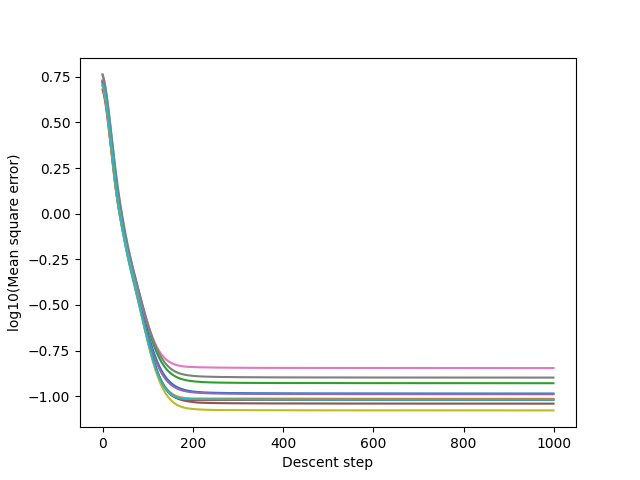

In [8]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<08:51,  1.88it/s]

  1%|█▋                                                                                                                                             | 12/1000 [00:00<00:40, 24.62it/s]

  2%|███▍                                                                                                                                           | 24/1000 [00:00<00:21, 46.10it/s]

  3%|████▊                                                                                                                                          | 34/1000 [00:00<00:16, 58.77it/s]

  4%|██████▎                                                                                                                                        | 44/1000 [00:00<00:13, 69.03it/s]

  6%|███████▊                                                                                                                                       | 55/1000 [00:01<00:12, 78.14it/s]

  7%|█████████▍                                                                                                                                     | 66/1000 [00:01<00:10, 86.69it/s]

  8%|███████████                                                                                                                                    | 77/1000 [00:01<00:09, 92.88it/s]

  9%|████████████▌                                                                                                                                  | 88/1000 [00:01<00:09, 97.64it/s]

 10%|██████████████                                                                                                                               | 100/1000 [00:01<00:08, 101.66it/s]

 11%|███████████████▊                                                                                                                             | 112/1000 [00:01<00:08, 105.05it/s]

 12%|█████████████████▍                                                                                                                           | 124/1000 [00:01<00:08, 107.36it/s]

 14%|███████████████████▏                                                                                                                         | 136/1000 [00:01<00:07, 108.99it/s]

 15%|████████████████████▊                                                                                                                        | 148/1000 [00:01<00:07, 107.30it/s]

 16%|██████████████████████▌                                                                                                                      | 160/1000 [00:02<00:07, 109.86it/s]

 17%|████████████████████████▎                                                                                                                    | 172/1000 [00:02<00:07, 112.52it/s]

 18%|█████████████████████████▉                                                                                                                   | 184/1000 [00:02<00:07, 113.41it/s]

 20%|███████████████████████████▋                                                                                                                 | 196/1000 [00:02<00:07, 112.34it/s]

 21%|█████████████████████████████▎                                                                                                               | 208/1000 [00:02<00:07, 111.28it/s]

 22%|███████████████████████████████                                                                                                              | 220/1000 [00:02<00:07, 109.83it/s]

 23%|████████████████████████████████▋                                                                                                            | 232/1000 [00:02<00:06, 110.29it/s]

 24%|██████████████████████████████████▍                                                                                                          | 244/1000 [00:02<00:07, 107.53it/s]

 26%|███████████████████████████████████▉                                                                                                         | 255/1000 [00:02<00:07, 104.48it/s]

 27%|█████████████████████████████████████▊                                                                                                        | 266/1000 [00:03<00:08, 89.19it/s]

 28%|███████████████████████████████████████▏                                                                                                      | 276/1000 [00:03<00:08, 87.44it/s]

 29%|████████████████████████████████████████▌                                                                                                     | 286/1000 [00:03<00:07, 90.24it/s]

 30%|██████████████████████████████████████████▏                                                                                                   | 297/1000 [00:03<00:07, 94.33it/s]

 31%|███████████████████████████████████████████▋                                                                                                  | 308/1000 [00:03<00:07, 96.46it/s]

 32%|█████████████████████████████████████████████▏                                                                                                | 318/1000 [00:03<00:07, 97.02it/s]

 33%|██████████████████████████████████████████████▌                                                                                               | 328/1000 [00:03<00:06, 96.08it/s]

 34%|███████████████████████████████████████████████▉                                                                                              | 338/1000 [00:03<00:07, 90.55it/s]

 35%|█████████████████████████████████████████████████▍                                                                                            | 348/1000 [00:03<00:07, 91.80it/s]

 36%|██████████████████████████████████████████████████▉                                                                                           | 359/1000 [00:04<00:06, 96.60it/s]

 37%|████████████████████████████████████████████████████▎                                                                                        | 371/1000 [00:04<00:06, 101.39it/s]

 38%|██████████████████████████████████████████████████████▏                                                                                      | 384/1000 [00:04<00:05, 107.44it/s]

 40%|███████████████████████████████████████████████████████▉                                                                                     | 397/1000 [00:04<00:05, 111.42it/s]

 41%|█████████████████████████████████████████████████████████▋                                                                                   | 409/1000 [00:04<00:05, 113.16it/s]

 42%|███████████████████████████████████████████████████████████▌                                                                                 | 422/1000 [00:04<00:04, 116.18it/s]

 43%|█████████████████████████████████████████████████████████████▏                                                                               | 434/1000 [00:04<00:04, 115.51it/s]

 45%|██████████████████████████████████████████████████████████████▉                                                                              | 446/1000 [00:04<00:04, 113.75it/s]

 46%|████████████████████████████████████████████████████████████████▋                                                                            | 459/1000 [00:04<00:04, 116.45it/s]

 47%|██████████████████████████████████████████████████████████████████▌                                                                          | 472/1000 [00:04<00:04, 118.38it/s]

 48%|████████████████████████████████████████████████████████████████████▏                                                                        | 484/1000 [00:05<00:04, 117.73it/s]

 50%|█████████████████████████████████████████████████████████████████████▉                                                                       | 496/1000 [00:05<00:04, 117.94it/s]

 51%|███████████████████████████████████████████████████████████████████████▋                                                                     | 508/1000 [00:05<00:04, 117.57it/s]

 52%|█████████████████████████████████████████████████████████████████████████▎                                                                   | 520/1000 [00:05<00:04, 116.92it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                  | 532/1000 [00:05<00:03, 117.55it/s]

 55%|████████████████████████████████████████████████████████████████████████████▊                                                                | 545/1000 [00:05<00:03, 118.61it/s]

 56%|██████████████████████████████████████████████████████████████████████████████▌                                                              | 557/1000 [00:05<00:03, 116.54it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▎                                                            | 570/1000 [00:05<00:03, 118.49it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████                                                           | 582/1000 [00:05<00:03, 117.24it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                         | 594/1000 [00:06<00:03, 116.28it/s]

 61%|█████████████████████████████████████████████████████████████████████████████████████▍                                                       | 606/1000 [00:06<00:03, 114.83it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▏                                                     | 618/1000 [00:06<00:03, 113.99it/s]

 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 630/1000 [00:06<00:03, 112.58it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 642/1000 [00:06<00:03, 109.32it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 653/1000 [00:06<00:03, 91.90it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 663/1000 [00:06<00:03, 93.08it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 674/1000 [00:06<00:03, 96.64it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 687/1000 [00:06<00:03, 103.90it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 699/1000 [00:07<00:02, 108.19it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 712/1000 [00:07<00:02, 111.85it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 724/1000 [00:07<00:02, 112.11it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 737/1000 [00:07<00:02, 114.83it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 749/1000 [00:07<00:02, 114.22it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 761/1000 [00:07<00:02, 113.84it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 773/1000 [00:07<00:01, 114.08it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 785/1000 [00:07<00:01, 113.88it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 797/1000 [00:07<00:01, 113.84it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 809/1000 [00:08<00:01, 112.82it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 821/1000 [00:08<00:01, 114.54it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 833/1000 [00:08<00:01, 114.97it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 846/1000 [00:08<00:01, 117.00it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 858/1000 [00:08<00:01, 116.68it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 871/1000 [00:08<00:01, 118.14it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 884/1000 [00:08<00:00, 119.40it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 897/1000 [00:08<00:00, 120.19it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 910/1000 [00:08<00:00, 120.18it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 923/1000 [00:08<00:00, 121.18it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 936/1000 [00:09<00:00, 121.92it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 949/1000 [00:09<00:00, 120.74it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 962/1000 [00:09<00:00, 120.69it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 975/1000 [00:09<00:00, 120.95it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 988/1000 [00:09<00:00, 121.44it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.31it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

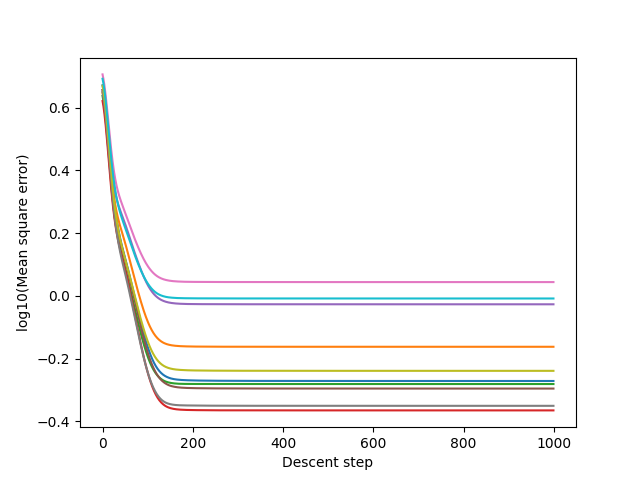

In [9]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)

  0%|                                                                                                                                                        | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                               | 1/1000 [00:00<09:30,  1.75it/s]

  1%|▊                                                                                                                                               | 6/1000 [00:00<01:29, 11.06it/s]

  1%|█▌                                                                                                                                             | 11/1000 [00:00<00:52, 18.91it/s]

  2%|██▎                                                                                                                                            | 16/1000 [00:00<00:38, 25.28it/s]

  2%|███                                                                                                                                            | 21/1000 [00:01<00:32, 29.83it/s]

  3%|███▋                                                                                                                                           | 26/1000 [00:01<00:28, 33.66it/s]

  3%|████▍                                                                                                                                          | 31/1000 [00:01<00:26, 36.68it/s]

  4%|█████▏                                                                                                                                         | 36/1000 [00:01<00:25, 38.55it/s]

  4%|█████▊                                                                                                                                         | 41/1000 [00:01<00:24, 39.70it/s]

  5%|██████▌                                                                                                                                        | 46/1000 [00:01<00:23, 40.69it/s]

  5%|███████▎                                                                                                                                       | 51/1000 [00:01<00:22, 41.42it/s]

  6%|████████                                                                                                                                       | 56/1000 [00:01<00:22, 41.40it/s]

  6%|████████▋                                                                                                                                      | 61/1000 [00:01<00:23, 40.47it/s]

  7%|█████████▍                                                                                                                                     | 66/1000 [00:02<00:22, 41.10it/s]

  7%|██████████▏                                                                                                                                    | 71/1000 [00:02<00:22, 41.57it/s]

  8%|██████████▊                                                                                                                                    | 76/1000 [00:02<00:22, 41.49it/s]

  8%|███████████▌                                                                                                                                   | 81/1000 [00:02<00:22, 40.18it/s]

  9%|████████████▎                                                                                                                                  | 86/1000 [00:02<00:24, 37.57it/s]

  9%|████████████▊                                                                                                                                  | 90/1000 [00:02<00:25, 36.35it/s]

 10%|█████████████▌                                                                                                                                 | 95/1000 [00:02<00:24, 37.69it/s]

 10%|██████████████▏                                                                                                                                | 99/1000 [00:02<00:24, 36.58it/s]

 10%|██████████████▋                                                                                                                               | 103/1000 [00:03<00:25, 34.95it/s]

 11%|███████████████▏                                                                                                                              | 107/1000 [00:03<00:25, 34.87it/s]

 11%|███████████████▊                                                                                                                              | 111/1000 [00:03<00:25, 35.36it/s]

 12%|████████████████▍                                                                                                                             | 116/1000 [00:03<00:23, 37.02it/s]

 12%|█████████████████                                                                                                                             | 120/1000 [00:03<00:24, 36.03it/s]

 12%|█████████████████▌                                                                                                                            | 124/1000 [00:03<00:24, 35.69it/s]

 13%|██████████████████▏                                                                                                                           | 128/1000 [00:03<00:23, 36.73it/s]

 13%|██████████████████▋                                                                                                                           | 132/1000 [00:03<00:23, 37.01it/s]

 14%|███████████████████▎                                                                                                                          | 136/1000 [00:04<00:23, 37.11it/s]

 14%|████████████████████                                                                                                                          | 141/1000 [00:04<00:22, 38.51it/s]

 15%|████████████████████▋                                                                                                                         | 146/1000 [00:04<00:21, 39.73it/s]

 15%|█████████████████████▍                                                                                                                        | 151/1000 [00:04<00:21, 40.41it/s]

 16%|██████████████████████▏                                                                                                                       | 156/1000 [00:04<00:20, 41.12it/s]

 16%|██████████████████████▊                                                                                                                       | 161/1000 [00:04<00:20, 41.30it/s]

 17%|███████████████████████▌                                                                                                                      | 166/1000 [00:04<00:20, 40.93it/s]

 17%|████████████████████████▎                                                                                                                     | 171/1000 [00:04<00:20, 40.13it/s]

 18%|████████████████████████▉                                                                                                                     | 176/1000 [00:04<00:20, 41.04it/s]

 18%|█████████████████████████▋                                                                                                                    | 181/1000 [00:05<00:19, 41.72it/s]

 19%|██████████████████████████▍                                                                                                                   | 186/1000 [00:05<00:19, 42.20it/s]

 19%|███████████████████████████                                                                                                                   | 191/1000 [00:05<00:19, 42.35it/s]

 20%|███████████████████████████▊                                                                                                                  | 196/1000 [00:05<00:18, 42.40it/s]

 20%|████████████████████████████▌                                                                                                                 | 201/1000 [00:05<00:18, 42.52it/s]

 21%|█████████████████████████████▎                                                                                                                | 206/1000 [00:05<00:18, 42.84it/s]

 21%|█████████████████████████████▉                                                                                                                | 211/1000 [00:05<00:18, 42.96it/s]

 22%|██████████████████████████████▋                                                                                                               | 216/1000 [00:05<00:18, 42.84it/s]

 22%|███████████████████████████████▍                                                                                                              | 221/1000 [00:06<00:18, 42.91it/s]

 23%|████████████████████████████████                                                                                                              | 226/1000 [00:06<00:17, 43.14it/s]

 23%|████████████████████████████████▊                                                                                                             | 231/1000 [00:06<00:18, 41.80it/s]

 24%|█████████████████████████████████▌                                                                                                            | 236/1000 [00:06<00:20, 37.00it/s]

 24%|██████████████████████████████████▏                                                                                                           | 241/1000 [00:06<00:19, 38.03it/s]

 24%|██████████████████████████████████▊                                                                                                           | 245/1000 [00:06<00:20, 37.15it/s]

 25%|███████████████████████████████████▎                                                                                                          | 249/1000 [00:06<00:20, 36.92it/s]

 25%|███████████████████████████████████▉                                                                                                          | 253/1000 [00:06<00:19, 37.68it/s]

 26%|████████████████████████████████████▍                                                                                                         | 257/1000 [00:06<00:19, 37.80it/s]

 26%|█████████████████████████████████████▏                                                                                                        | 262/1000 [00:07<00:18, 39.67it/s]

 27%|█████████████████████████████████████▉                                                                                                        | 267/1000 [00:07<00:18, 40.18it/s]

 27%|██████████████████████████████████████▌                                                                                                       | 272/1000 [00:07<00:17, 40.86it/s]

 28%|███████████████████████████████████████▎                                                                                                      | 277/1000 [00:07<00:17, 41.04it/s]

 28%|████████████████████████████████████████                                                                                                      | 282/1000 [00:07<00:17, 42.01it/s]

 29%|████████████████████████████████████████▊                                                                                                     | 287/1000 [00:07<00:16, 42.70it/s]

 29%|█████████████████████████████████████████▍                                                                                                    | 292/1000 [00:07<00:16, 43.24it/s]

 30%|██████████████████████████████████████████▏                                                                                                   | 297/1000 [00:07<00:16, 43.57it/s]

 30%|██████████████████████████████████████████▉                                                                                                   | 302/1000 [00:08<00:16, 43.31it/s]

 31%|███████████████████████████████████████████▌                                                                                                  | 307/1000 [00:08<00:16, 42.96it/s]

 31%|████████████████████████████████████████████▎                                                                                                 | 312/1000 [00:08<00:16, 42.66it/s]

 32%|█████████████████████████████████████████████                                                                                                 | 317/1000 [00:08<00:16, 42.53it/s]

 32%|█████████████████████████████████████████████▋                                                                                                | 322/1000 [00:08<00:15, 42.43it/s]

 33%|██████████████████████████████████████████████▍                                                                                               | 327/1000 [00:08<00:15, 42.08it/s]

 33%|███████████████████████████████████████████████▏                                                                                              | 332/1000 [00:08<00:16, 41.10it/s]

 34%|███████████████████████████████████████████████▊                                                                                              | 337/1000 [00:08<00:16, 40.46it/s]

 34%|████████████████████████████████████████████████▌                                                                                             | 342/1000 [00:09<00:16, 39.83it/s]

 35%|█████████████████████████████████████████████████▎                                                                                            | 347/1000 [00:09<00:16, 40.51it/s]

 35%|█████████████████████████████████████████████████▉                                                                                            | 352/1000 [00:09<00:15, 40.94it/s]

 36%|██████████████████████████████████████████████████▋                                                                                           | 357/1000 [00:09<00:16, 40.09it/s]

 36%|███████████████████████████████████████████████████▍                                                                                          | 362/1000 [00:09<00:15, 40.64it/s]

 37%|████████████████████████████████████████████████████                                                                                          | 367/1000 [00:09<00:16, 38.27it/s]

 37%|████████████████████████████████████████████████████▋                                                                                         | 371/1000 [00:09<00:16, 37.87it/s]

 38%|█████████████████████████████████████████████████████▎                                                                                        | 375/1000 [00:09<00:17, 36.09it/s]

 38%|█████████████████████████████████████████████████████▊                                                                                        | 379/1000 [00:09<00:17, 36.45it/s]

 38%|██████████████████████████████████████████████████████▌                                                                                       | 384/1000 [00:10<00:15, 38.85it/s]

 39%|███████████████████████████████████████████████████████▏                                                                                      | 389/1000 [00:10<00:15, 39.79it/s]

 39%|███████████████████████████████████████████████████████▉                                                                                      | 394/1000 [00:10<00:14, 40.47it/s]

 40%|████████████████████████████████████████████████████████▋                                                                                     | 399/1000 [00:10<00:14, 41.20it/s]

 40%|█████████████████████████████████████████████████████████▎                                                                                    | 404/1000 [00:10<00:14, 41.46it/s]

 41%|██████████████████████████████████████████████████████████                                                                                    | 409/1000 [00:10<00:14, 40.66it/s]

 41%|██████████████████████████████████████████████████████████▊                                                                                   | 414/1000 [00:10<00:14, 40.79it/s]

 42%|███████████████████████████████████████████████████████████▍                                                                                  | 419/1000 [00:10<00:14, 41.26it/s]

 42%|████████████████████████████████████████████████████████████▏                                                                                 | 424/1000 [00:11<00:13, 41.68it/s]

 43%|████████████████████████████████████████████████████████████▉                                                                                 | 429/1000 [00:11<00:13, 41.81it/s]

 43%|█████████████████████████████████████████████████████████████▋                                                                                | 434/1000 [00:11<00:13, 42.20it/s]

 44%|██████████████████████████████████████████████████████████████▎                                                                               | 439/1000 [00:11<00:13, 42.56it/s]

 44%|███████████████████████████████████████████████████████████████                                                                               | 444/1000 [00:11<00:12, 43.08it/s]

 45%|███████████████████████████████████████████████████████████████▊                                                                              | 449/1000 [00:11<00:13, 42.18it/s]

 45%|████████████████████████████████████████████████████████████████▍                                                                             | 454/1000 [00:11<00:13, 41.84it/s]

 46%|█████████████████████████████████████████████████████████████████▏                                                                            | 459/1000 [00:11<00:13, 41.24it/s]

 46%|█████████████████████████████████████████████████████████████████▉                                                                            | 464/1000 [00:12<00:13, 40.77it/s]

 47%|██████████████████████████████████████████████████████████████████▌                                                                           | 469/1000 [00:12<00:13, 40.61it/s]

 47%|███████████████████████████████████████████████████████████████████▎                                                                          | 474/1000 [00:12<00:13, 40.45it/s]

 48%|████████████████████████████████████████████████████████████████████                                                                          | 479/1000 [00:12<00:12, 41.13it/s]

 48%|████████████████████████████████████████████████████████████████████▋                                                                         | 484/1000 [00:12<00:12, 41.46it/s]

 49%|█████████████████████████████████████████████████████████████████████▍                                                                        | 489/1000 [00:12<00:12, 41.64it/s]

 49%|██████████████████████████████████████████████████████████████████████▏                                                                       | 494/1000 [00:12<00:12, 42.09it/s]

 50%|██████████████████████████████████████████████████████████████████████▊                                                                       | 499/1000 [00:12<00:11, 42.46it/s]

 50%|███████████████████████████████████████████████████████████████████████▌                                                                      | 504/1000 [00:12<00:11, 42.70it/s]

 51%|████████████████████████████████████████████████████████████████████████▎                                                                     | 509/1000 [00:13<00:11, 42.73it/s]

 51%|████████████████████████████████████████████████████████████████████████▉                                                                     | 514/1000 [00:13<00:11, 42.78it/s]

 52%|█████████████████████████████████████████████████████████████████████████▋                                                                    | 519/1000 [00:13<00:11, 42.80it/s]

 52%|██████████████████████████████████████████████████████████████████████████▍                                                                   | 524/1000 [00:13<00:11, 41.19it/s]

 53%|███████████████████████████████████████████████████████████████████████████                                                                   | 529/1000 [00:13<00:11, 39.86it/s]

 53%|███████████████████████████████████████████████████████████████████████████▊                                                                  | 534/1000 [00:13<00:13, 35.22it/s]

 54%|████████████████████████████████████████████████████████████████████████████▍                                                                 | 538/1000 [00:13<00:13, 35.23it/s]

 54%|████████████████████████████████████████████████████████████████████████████▉                                                                 | 542/1000 [00:13<00:13, 34.72it/s]

 55%|█████████████████████████████████████████████████████████████████████████████▌                                                                | 546/1000 [00:14<00:12, 35.55it/s]

 55%|██████████████████████████████████████████████████████████████████████████████                                                                | 550/1000 [00:14<00:12, 35.67it/s]

 55%|██████████████████████████████████████████████████████████████████████████████▋                                                               | 554/1000 [00:14<00:12, 35.70it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▏                                                              | 558/1000 [00:14<00:12, 36.55it/s]

 56%|███████████████████████████████████████████████████████████████████████████████▊                                                              | 562/1000 [00:14<00:11, 36.76it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▎                                                             | 566/1000 [00:14<00:12, 35.81it/s]

 57%|████████████████████████████████████████████████████████████████████████████████▉                                                             | 570/1000 [00:14<00:11, 35.98it/s]

 57%|█████████████████████████████████████████████████████████████████████████████████▌                                                            | 574/1000 [00:14<00:11, 35.70it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████                                                            | 578/1000 [00:14<00:11, 35.39it/s]

 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                           | 582/1000 [00:15<00:11, 36.36it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▏                                                          | 586/1000 [00:15<00:11, 35.46it/s]

 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                          | 590/1000 [00:15<00:11, 34.71it/s]

 59%|████████████████████████████████████████████████████████████████████████████████████▎                                                         | 594/1000 [00:15<00:12, 32.06it/s]

 60%|████████████████████████████████████████████████████████████████████████████████████▉                                                         | 598/1000 [00:15<00:12, 31.27it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████████▍                                                        | 602/1000 [00:15<00:12, 32.96it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████                                                        | 606/1000 [00:15<00:11, 34.57it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                       | 610/1000 [00:15<00:11, 33.14it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████████▏                                                      | 614/1000 [00:16<00:12, 30.31it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████████▊                                                      | 618/1000 [00:16<00:13, 27.92it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 621/1000 [00:16<00:13, 27.39it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 624/1000 [00:16<00:14, 26.78it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 628/1000 [00:16<00:13, 28.31it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 632/1000 [00:16<00:11, 30.94it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 636/1000 [00:16<00:11, 30.96it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 640/1000 [00:17<00:12, 29.68it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 644/1000 [00:17<00:12, 28.76it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 647/1000 [00:17<00:12, 28.31it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 650/1000 [00:17<00:12, 28.43it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 654/1000 [00:17<00:11, 31.30it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 659/1000 [00:17<00:10, 33.65it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 663/1000 [00:17<00:10, 30.94it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 667/1000 [00:17<00:11, 29.60it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 671/1000 [00:18<00:11, 29.79it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 676/1000 [00:18<00:09, 32.93it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 680/1000 [00:18<00:09, 32.22it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 684/1000 [00:18<00:10, 30.30it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 688/1000 [00:18<00:10, 28.87it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 691/1000 [00:18<00:10, 28.83it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 696/1000 [00:18<00:09, 32.12it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 700/1000 [00:18<00:09, 32.23it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 704/1000 [00:19<00:09, 30.39it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 708/1000 [00:19<00:09, 29.48it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 712/1000 [00:19<00:09, 30.33it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 717/1000 [00:19<00:08, 33.40it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 721/1000 [00:19<00:08, 34.31it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 725/1000 [00:19<00:08, 31.54it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 729/1000 [00:19<00:09, 29.77it/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 733/1000 [00:20<00:09, 28.77it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 736/1000 [00:20<00:09, 28.81it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 740/1000 [00:20<00:08, 30.14it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 744/1000 [00:20<00:08, 30.14it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 748/1000 [00:20<00:08, 31.16it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 753/1000 [00:20<00:07, 34.29it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 758/1000 [00:20<00:06, 36.37it/s]

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 762/1000 [00:20<00:06, 34.45it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 766/1000 [00:21<00:07, 31.71it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 770/1000 [00:21<00:08, 28.70it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 775/1000 [00:21<00:06, 32.22it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 780/1000 [00:21<00:06, 34.69it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 784/1000 [00:21<00:06, 31.94it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 788/1000 [00:21<00:07, 30.23it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 792/1000 [00:21<00:06, 30.99it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 796/1000 [00:22<00:06, 31.55it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 800/1000 [00:22<00:06, 30.52it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 804/1000 [00:22<00:06, 31.09it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 808/1000 [00:22<00:05, 32.64it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 812/1000 [00:22<00:05, 32.25it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 816/1000 [00:22<00:06, 28.87it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 820/1000 [00:22<00:06, 29.74it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 825/1000 [00:22<00:05, 32.59it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 829/1000 [00:23<00:05, 32.68it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 833/1000 [00:23<00:04, 33.72it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 837/1000 [00:23<00:04, 34.69it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 841/1000 [00:23<00:04, 35.88it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 846/1000 [00:23<00:04, 38.14it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 851/1000 [00:23<00:03, 39.71it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 856/1000 [00:23<00:03, 40.81it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 861/1000 [00:23<00:03, 38.11it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 865/1000 [00:23<00:03, 36.97it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 869/1000 [00:24<00:03, 34.36it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 874/1000 [00:24<00:03, 37.50it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 879/1000 [00:24<00:03, 39.26it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 884/1000 [00:24<00:02, 40.33it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 889/1000 [00:24<00:02, 40.95it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 894/1000 [00:24<00:02, 41.14it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 899/1000 [00:24<00:02, 39.66it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 903/1000 [00:24<00:02, 38.95it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 907/1000 [00:25<00:02, 36.62it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 912/1000 [00:25<00:02, 38.38it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 917/1000 [00:25<00:02, 40.10it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 922/1000 [00:25<00:01, 40.54it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 927/1000 [00:25<00:01, 39.81it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 932/1000 [00:25<00:01, 40.30it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 937/1000 [00:25<00:01, 37.27it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 942/1000 [00:25<00:01, 38.63it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 947/1000 [00:26<00:01, 39.48it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 952/1000 [00:26<00:01, 40.61it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 957/1000 [00:26<00:01, 40.46it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 962/1000 [00:26<00:01, 36.99it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 966/1000 [00:26<00:00, 36.60it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 971/1000 [00:26<00:00, 36.56it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 975/1000 [00:26<00:00, 37.28it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 980/1000 [00:26<00:00, 38.61it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 985/1000 [00:27<00:00, 39.71it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 989/1000 [00:27<00:00, 39.68it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:27<00:00, 39.54it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 997/1000 [00:27<00:00, 39.65it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.42it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

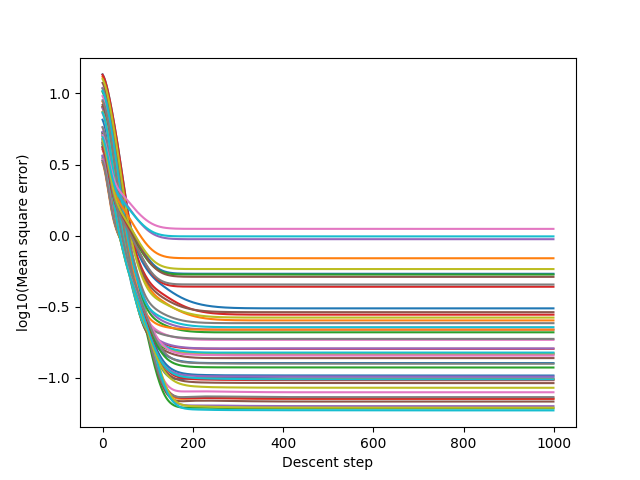

In [10]:
iq6 = ImageQuant2(
    img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het,
    roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het,
    cytbg=cytbg,
)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

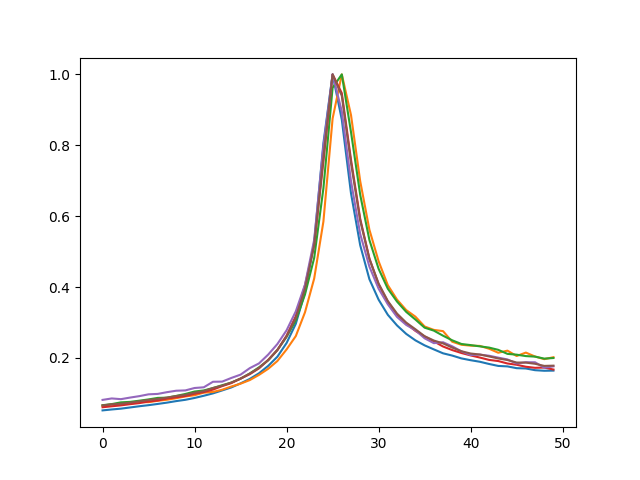

In [11]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [12]:
# Save
np.savetxt("../../data/calibration_mem1.txt", iq1.membg)
np.savetxt("../../data/calibration_mem2.txt", iq2.membg)
np.savetxt("../../data/calibration_mem3.txt", iq3.membg)
np.savetxt("../../data/calibration_mem4.txt", iq4.membg)
np.savetxt("../../data/calibration_mem5.txt", iq5.membg)
np.savetxt("../../data/calibration_mem6.txt", iq6.membg)